

## Assignment 2: Data, Grammar and Engineering

**AMS MADE YMS31303**<br>
**Q1 2024**<br>
**Instructor:** Theodoros Chatzivasileiadis <br>
**Instructor:** Hans Hoogenboom <br>
**TA:** Ka Yi Chua <br>
**[Metropolitan Data 1](https://jhoogenboom.github.io/spatial-data-science/_index.html)** <br>

---



## Question 1

We will work with data from the Guardian's version of [Wikileaks' Afghanistan war logs](http://www.theguardian.com/news/datablog/2010/jul/27/wikileaks-afghanistan-data-datajournalism). The table is stored on a GoogleDoc on the following address:

> [https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1](https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1)

Write a Python code snippet using IPython.display to embed this Google Sheet directly into a Jupyter notebook for easy reference and interaction.

In [27]:
# your code here
# use many cells if you like to structure your code well
from IPython.display import IFrame

# URL of the Google Sheet (ensure it is set to public)
sheet_url = "https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1"

# Embed the Google Sheet in an iframe
IFrame(sheet_url, width=800, height=600)

In [28]:
# This ensures visualizations are plotted inside the notebook
%matplotlib inline
import matplotlib
import os              # This provides several system utilities
import pandas as pd    # This is the workhorse of data munging in Python
import numpy as np     # This is for general numerical operations 
import seaborn as sns  # This allows us to efficiently and beautifully plot
import os              # This provides several system utilities


## Question 2
a) Save the csv file to your compluter and Load the data in Tab "TOTAL Casualties".

b) Display the first 5 rows of the dataset using .head().

c) Extract the column names and create a dictionary where each column name is the key, and the first value in that column is the value.

In [34]:
# your code here
# use many cells if you like to structure your code well

f = 'Wikileaks Afghanistan war logs analysis - TOTAL CASUALTIES, ALL CAUSES.csv'
db = pd.read_csv(f)

db.columns = db.values[0]

print(db.values[-1])
db = db.iloc[:-1] # remove last row since it contains totals
print(db.values[-1])

# Drop the first row from the DataFrame as it's now the header
db = db.drop(db.index[0]).reset_index(drop=True)

display(db.head())
db = db.apply(pd.to_numeric, errors='ignore')
print(db.dtypes)

dictionary = dict()
for col in db.columns:

    dictionary[col] = db[col].values[0]

display(dictionary)

[nan '24498' '15507' '4024' '3820' '1147' nan]
['2009' 'December' '287' '87' '65' '33' '35']


,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
0,2004,January,15,51,23,NaN,11
1,2004,February,NaN,7,4,5,2
2,2004,March,19,2,NaN,2,3
3,2004,April,5,3,19,NaN,3
4,2004,May,18,29,56,6,9


Year                                int64
Month                              object
Taliban                           float64
Civilians                           int64
Afghan forces                     float64
Nato (detailed in spreadsheet)    float64
Nato - official figures             int64
dtype: object


{'Year': 2004,
 'Month': 'January',
 'Taliban': 15.0,
 'Civilians': 51,
 'Afghan forces': 23.0,
 'Nato (detailed in spreadsheet)': nan,
 'Nato - official figures': 11}

## Question 3
a) Plot a histogram of any numeric column from the dataset.

b) Use a kernel density plot (KDE) to visualize the distribution of another numeric column.

c) Create a bar chart of a categorical variable and discuss how the plot changes if you switch to a horizontal bar plot.

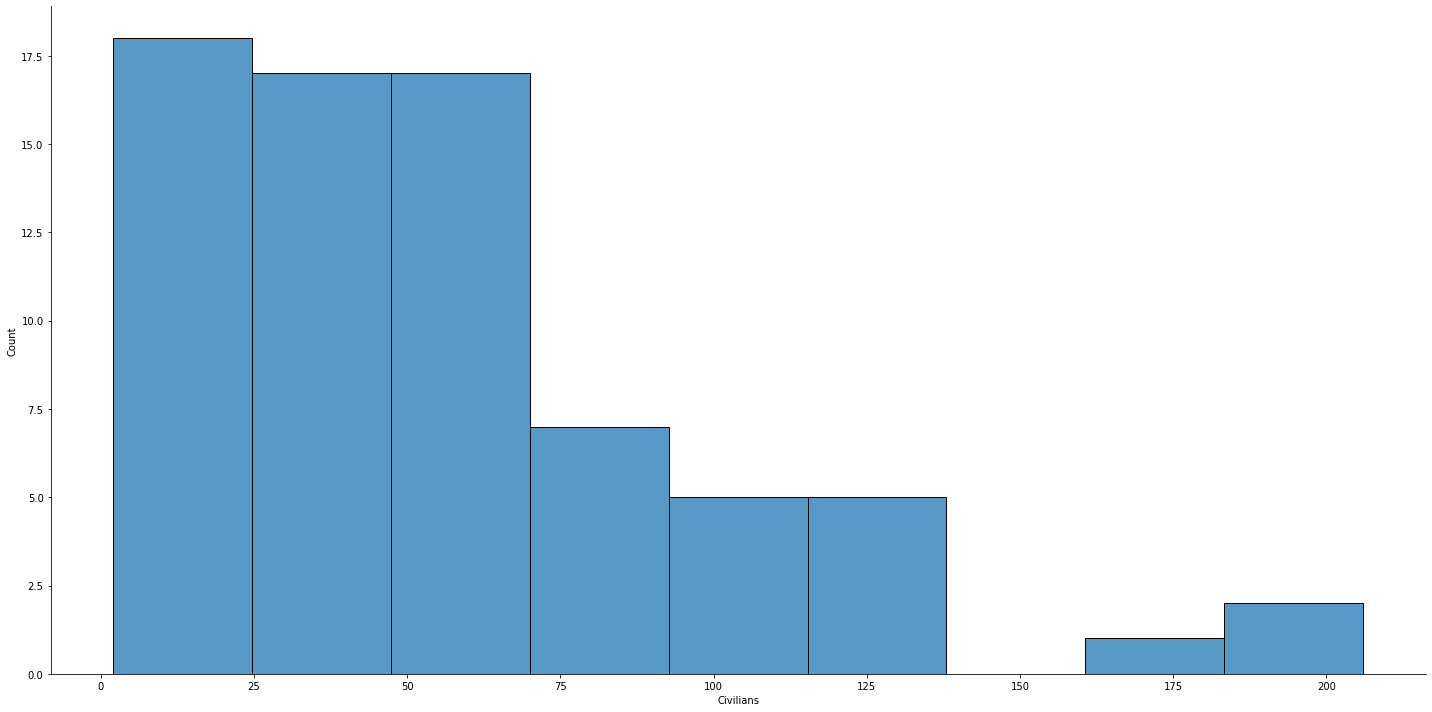

In [35]:
# your code here
# use many cells if you like to structure your code well

_ = sns.displot(db['Civilians'], kde=False, height=10, aspect=2)

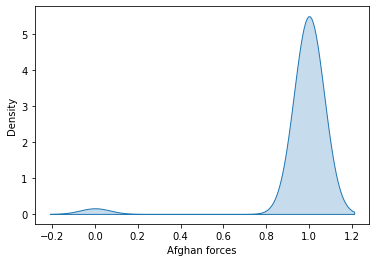

In [41]:
_ = sns.kdeplot(db['Afghan forces'].notna(), fill=True)

## Question 4
a) Write a loop that iterates through each row of a DataFrame and prints the value of one specific column.

b) Modify the loop so that it extracts rows where a numeric column value is greater than a threshold and stores these rows in a new DataFrame.

In [42]:
# your code here
# use many cells if you like to structure your code well
threshold = 2005
new_db = pd.DataFrame(columns=db.columns)

for i in range(len(db)):
    row = db.iloc[i]
    print(f"Year: {row['Year']}")

    if row['Year'] > threshold:
        new_db.loc[len(new_db)] = row

display(new_db)



    


Year: 2004
Year: 2004
Year: 2004
Year: 2004
Year: 2004
Year: 2004
Year: 2004
Year: 2004
Year: 2004
Year: 2004
Year: 2004
Year: 2004
Year: 2005
Year: 2005
Year: 2005
Year: 2005
Year: 2005
Year: 2005
Year: 2005
Year: 2005
Year: 2005
Year: 2005
Year: 2005
Year: 2005
Year: 2006
Year: 2006
Year: 2006
Year: 2006
Year: 2006
Year: 2006
Year: 2006
Year: 2006
Year: 2006
Year: 2006
Year: 2006
Year: 2006
Year: 2007
Year: 2007
Year: 2007
Year: 2007
Year: 2007
Year: 2007
Year: 2007
Year: 2007
Year: 2007
Year: 2007
Year: 2007
Year: 2007
Year: 2008
Year: 2008
Year: 2008
Year: 2008
Year: 2008
Year: 2008
Year: 2008
Year: 2008
Year: 2008
Year: 2008
Year: 2008
Year: 2008
Year: 2009
Year: 2009
Year: 2009
Year: 2009
Year: 2009
Year: 2009
Year: 2009
Year: 2009
Year: 2009
Year: 2009
Year: 2009
Year: 2009


,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
0,2006,January,26.0,93,14.0,1.0,1
1,2006,February,12.0,54,106.0,12.0,17
2,2006,March,36.0,37,61.0,15.0,13
3,2006,April,52.0,33,43.0,5.0,5
4,2006,May,85.0,54,50.0,16.0,17
5,2006,June,295.0,71,39.0,19.0,22
6,2006,July,220.0,64,36.0,13.0,19
7,2006,August,161.0,101,42.0,18.0,29
8,2006,September,945.0,172,97.0,19.0,38
9,2006,October,333.0,44,70.0,17.0,17


## Question 5
a) Crate a list containing the names "Civilians" and "Afghan forces"

b) From the imported data keep the the values from these two columns only. Keep in mind that "Year" and "Month" identify each column and sould remain in the dataset.

c) Obtain a monthly total count of casualties for these two groups and create a line and a bar plot of them.


,Year,Month,Civilians,Afghan forces,Total Casualties
0,2004,January,51,23.0,74.0
1,2004,February,7,4.0,11.0
2,2004,March,2,NaN,NaN
3,2004,April,3,19.0,22.0
4,2004,May,29,56.0,85.0
...,...,...,...,...,...
67,2009,August,206,190.0,396.0
68,2009,September,197,133.0,330.0
69,2009,October,107,86.0,193.0
70,2009,November,120,69.0,189.0


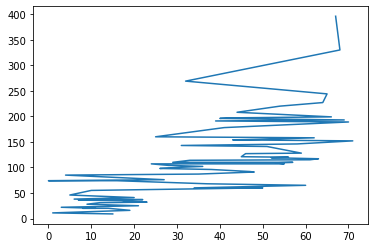

In [48]:
l = ['Civilians', 'Afghan forces']

for col in db.columns:
    if col in l or col == "Month" or col == "Year":
        continue

    db = db.drop(columns=[col])

db['Total Casualties'] = db['Civilians'] + db['Afghan forces']

display(db)


_ = db['Total Casualties'].sort_values(ascending=False).plot()
